In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from nanonets import NANONETSOCR
import requests
import json

In [2]:
# Load the image
img = cv2.imread('rajandai.jpeg')
img = cv2.resize(img, (900, 600))
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

<h2>2. Applying filter and finding edges for localization</h2>

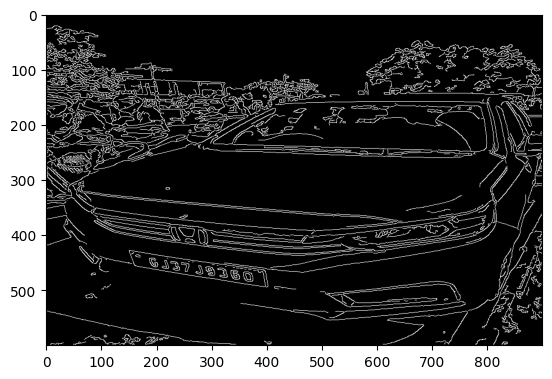

In [3]:
# Apply Gaussian blur to remove noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection to find edges
edges = cv2.Canny(blur, 50, 150)
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))

<h2>3. Find Contours and Apply Mask</h2>

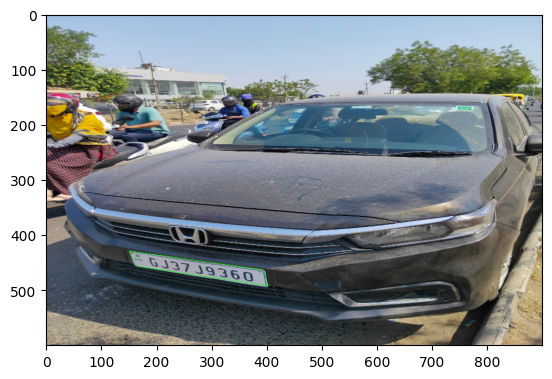

In [4]:
# Find contours in the image
contours, hierarchy = cv2.findContours(
    edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through all contours and find the one that represents the number plate
location = None
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 2000:
        # Approximate the contour to a polygon
        approx = cv2.approxPolyDP(
            contour, 0.02*cv2.arcLength(contour, True), True)  # 0.01*cv2.arcLength(contour, True)

        # Check if the polygon has four sides (as number plates usually do)
        if len(approx) == 4:
            # Draw a green rectangle around the number plate
            location = approx
            cv2.drawContours(img, [approx], 0, (0, 255, 0), 1)
x,y,w,h = cv2.boundingRect(approx)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


In [5]:
try:
    if(len(location) != 0):
        mask = np.zeros(gray.shape, np.uint8)
        new_image = cv2.drawContours(mask, [location], 0, 255, -1)
        new_image = cv2.bitwise_and(img, img, mask=mask)
except: 
    new_image = img


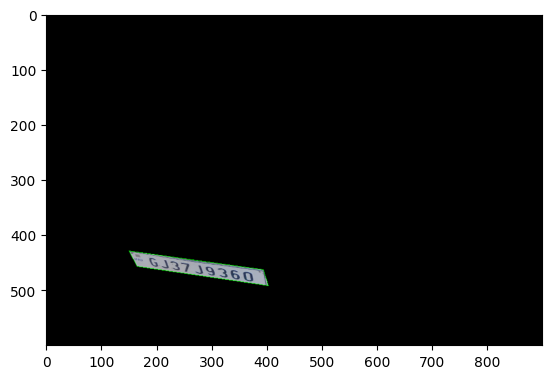

In [6]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [7]:
cv2.imwrite('Cropped.jpg',new_image)

True

{
  "results": [
    {
      "filename": "Cropped.jpg",
      "page_data": [
        {
          "page": 0,
          "size": {},
          "words": [
            {
              "text": "SSTAUBSD",
              "xmin": 183,
              "ymin": 436,
              "xmax": 377,
              "ymax": 487
            }
          ],
          "raw_text": "SSTAUBSD "
        }
      ]
    }
  ]
}
SSTAUBSD


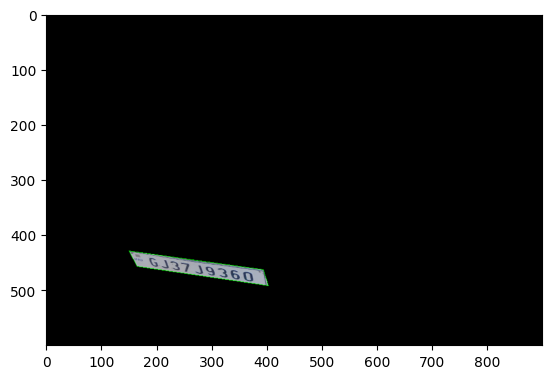

In [8]:

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

# Replace YOUR_API_KEY and YOUR_MODEL_ID with your actual values
api_key = '99e17aa2-dd30-11ed-9a00-8e45386f1393'
model_id = '45c3ea0d-dc25-4d41-99f4-5aed304f92ed'
# Initialise
from nanonets import NANONETSOCR
model = NANONETSOCR()

# Authenticate
# This software is perpetually free :)
# You can get your free API key (with unlimited requests) by creating a free account on https://app.nanonets.com/#/keys?utm_source=wrapper.
model.set_token(api_key)

# PDF / Image to Raw OCR Engine Output
import json
pred_json = model.convert_to_prediction('Cropped.jpg')
print(json.dumps(pred_json, indent=2))

# PDF / Image to String
string = model.convert_to_string('Cropped.jpg')

print(string)

# # PDF / Image to TXT File
# model.convert_to_txt('INPUT_FILE', output_file_name = 'OUTPUTNAME.txt')

In [9]:
import re

# input text string
plate_text = string

# remove all whitespace characters from the string
plate_text = re.sub(r'[^a-zA-Z0-9\s]', '', plate_text).upper()
plate_text = plate_text.replace(" ", "")
plate_text = plate_text.replace('\n', '')

# regular expression pattern to match Indian number plates
print(plate_text)

# Remove leading noise character
def filter_text(text, regex):
    # Extract only uppercase letters and digits
    filtered_text = re.sub(r'[^a-zA-Z0-9\s]', '', text).upper()
    filtered_text = filtered_text.replace(" ", "")
    filtered_text = filtered_text.replace('\n', '')
    # Extract only uppercase letters and digits

    filtered_text = ''.join(filter(str.isalnum, text.upper()))
    # Apply regex to filtered text
    match = re.search(regex, filtered_text)
    if match:
        return match.group()
    else:
        # Remove non-matching characters from start of the string
        while len(filtered_text) > 0 and not re.match(regex, filtered_text):
            filtered_text = filtered_text[1:]
        # Remove non-matching characters from end of the string
        while len(filtered_text) > 0 and not re.match(regex, filtered_text):
            filtered_text = filtered_text[:-1]
        # Check if the resulting text matches the regex
        match = re.search(regex, filtered_text)
        if match:
            return match.group()
        else:
            return None


# for indian number plates
regex = '^[A-Z]{2}[0-9]{2}[A-HJ-NP-Z]{1,2}[0-9]{4}$|^[0-9]{2}BH[0-9]{4}[A-HJ-NP-Z]{1,2}$'
output = filter_text(string, regex)



print("The number plate text is: ", output)


SSTAUBSD
The number plate text is:  None
